<a href="https://colab.research.google.com/github/priyankkumar218/MISC/blob/master/ML14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

In [5]:
dataset = fetch_openml('mnist_784')

In [11]:
X = dataset.data

In [12]:
y = dataset.target

In [13]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [14]:
y = y.astype('int32')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

The encoding of images is Hue Saturation Value (HSV). The pixels are represented by numbers from 0 to 255.

In [19]:
X.shape

(70000, 784)

In [27]:
def print_digit(index):
  some_digit = X[index]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image, "binary")
  plt.axis('off')
  plt.show()

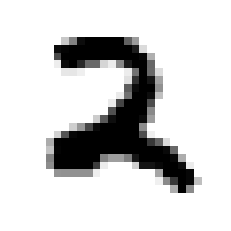

In [28]:
print_digit(7939)

In [36]:
X_plot = X.reshape((70000, 28, 28))

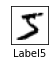

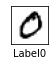

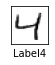

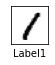

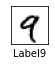

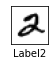

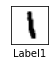

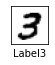

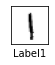

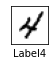

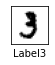

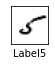

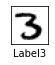

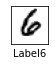

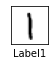

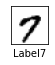

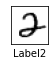

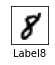

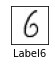

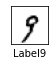

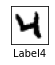

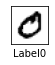

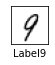

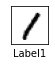

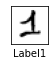

In [47]:
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_plot[i], "binary")
  plt.xlabel('Label{}'.format(y[i]))
  plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [50]:
from sklearn.svm import SVC
svm = SVC()

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()

In [54]:
# %time log_reg.fit(X_train, y_train)
# %time knn.fit(X_train, y_train)
# %time svm.fit(X_train, y_train)
%time nb.fit(X_train, y_train)
%time dtf.fit(X_train, y_train)

CPU times: user 486 ms, sys: 2.85 ms, total: 489 ms
Wall time: 494 ms
CPU times: user 17.9 s, sys: 6.4 ms, total: 17.9 s
Wall time: 17.9 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
nb.score(X_train, y_train)

0.539530612244898

In [57]:
dtf.score(X_train, y_train)

1.0

In [58]:
nb.score(X_test, y_test)

0.541047619047619

In [59]:
dtf.score(X_test, y_test)

0.8678095238095238

The DT Algo is overfitting the training dataset.
The naive bayes generalizes well on the test set.

In [60]:
y_pred_nb = nb.predict(X_test)

In [61]:
y_pred_dtf = dtf.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm_dt = confusion_matrix(y_test, y_pred_dtf)

In [64]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
precision_score(y_test, y_pred_dtf, average='micro')

0.8678095238095238

In [87]:
recall_score(y_test, y_pred_dtf, average='micro')

0.8678095238095238

In [88]:
f1_score(y_test, y_pred_dtf, average='micro')

0.8678095238095238

In [89]:
precision_score(y_test, y_pred_nb, average='micro')

0.541047619047619

In [90]:
recall_score(y_test, y_pred_nb, average='micro')

0.541047619047619

In [91]:
f1_score(y_test, y_pred_nb, average='micro')

0.541047619047619

In [92]:
precision_score(y_test, y_pred_dtf, average='macro')

0.8660586609867064

In [93]:
recall_score(y_test, y_pred_dtf, average='macro')

0.8659569281088737

In [94]:
f1_score(y_test, y_pred_dtf, average='macro')

0.8659688136233903

In [95]:
precision_score(y_test, y_pred_nb, average='macro')

0.6697263662396042

In [96]:
recall_score(y_test, y_pred_nb, average='macro')

0.5314332255907581

In [97]:
f1_score(y_test, y_pred_nb, average='macro')

0.4893190945130101

In [99]:
pd.DataFrame(y_pred_nb).head(10)

,0
0,0
1,9
2,1
3,0
4,9
5,9
6,7
7,1
8,1
9,7


In [101]:
pd.DataFrame(y_pred_dtf).head(10)

,0
0,0
1,4
2,1
3,2
4,7
5,7
6,7
7,1
8,1
9,7


In [103]:
pd.DataFrame(y).head(10)

,0
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3
8,1
9,4
